# Recommendation System Notebook
- User based recommendation
- User based prediction
- Item based recommendation
- Item based prediction
- Evaluation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
df = pd.read_csv('beer_data.csv', encoding='latin-1')

In [2]:
df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [3]:
df.shape

(475984, 3)

Dataset contains 3 attributes Beer Id, Reviewer Name & Rating given by reviewer. Total 475984 reviews are given.


In [4]:
df.isnull().sum()

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

Total 100 reviews have empty review_profilename.

Updating beer datset removing empty review_profilename.


In [5]:
df = df[df['review_profilename'].notnull()]


In [6]:
df.shape

(475884, 3)

Checking Duplicates
Checking for duplicates where both item and user are duplicated or same user gave multiple ratings to same beer.


In [7]:
df.drop_duplicates()


,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5
8,58046,bashiba,4.5
9,58046,oberon,4.0


There are 475304 distinct records

I. Data Preparation
1. Choose only those beers that have at least N number of reviews

Lets find all distinct beers & total reviews they received


In [8]:
df.beer_beerid.nunique()


40304

In [9]:
df

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5
8,58046,bashiba,4.5
9,58046,oberon,4.0


Total 40304 distinct beers.


In [10]:
df['beer_review_count'] = df.groupby('beer_beerid')['beer_beerid'].transform('count')



In [102]:
df.head()

,beer_beerid,review_profilename,review_overall,beer_review_count
0,48215,stcules,3.0,1
1,52159,oline73,3.0,4
2,52159,alpinebryant,3.0,4
3,52159,rawthar,4.0,4
4,52159,RangerClegg,3.5,4


It seems that most beers get very few reviews. In fact very few beers have large enough number of reviews required for building recommendation system based on collaborative filtering.

Lets filter the dataset with beers having atleast 50 reviews


In [11]:
df = df[df['beer_review_count'] >= 50]

In [12]:
df.shape

(297287, 4)

297287 beers that has number of reviews greater than 50

Data exploration

What are the unique values of ratings?



In [13]:
list(df['review_overall'].unique())


[3.0, 4.5, 4.0, 5.0, 3.5, 2.0, 2.5, 1.5, 1.0]

In [ ]:
Visualize The average beer ratings


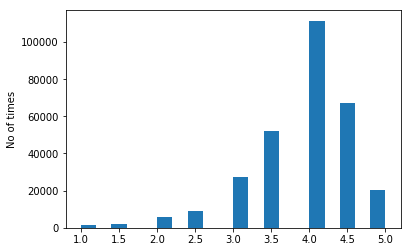

In [14]:
x = df['review_overall']
plt.hist(x, bins=20)
plt.ylabel('No of times')
plt.show()


In [15]:
df.loc[:,"review_overall"].mean()

3.882265285733988

In [ ]:
The average beer ratings is 3.8



The average number of ratings given to the beers



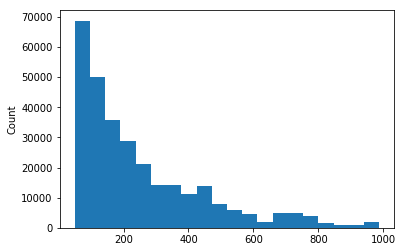

In [16]:
x = df['beer_review_count']
plt.hist(x, bins=20)
plt.ylabel('Count')
plt.show()


In [18]:
df.loc[:,"beer_review_count"].mean()

248.74852583530392

The average number of ratings given to the beers - 249



The average number of ratings given by the users




In [19]:
df['user_review_count'] = df.groupby('review_profilename')['review_profilename'].transform('count')


C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df

,beer_beerid,review_profilename,review_overall,beer_review_count,user_review_count
12,436,Brent,3.0,127,307
101,10784,CHILLINDYLAN,4.5,119,47
102,10784,JayQue,4.0,119,196
103,10784,AlCaponeJunior,4.0,119,152
104,10784,BEERchitect,4.0,119,465
105,10784,Jayli,4.0,119,205
106,10784,clayrock81,4.0,119,254
107,10784,beerphan,4.0,119,101
108,10784,OWSLEY069,3.0,119,256
109,10784,AEK,4.0,119,26


In [21]:
df.loc[:,"user_review_count"].mean()

103.60284506217897

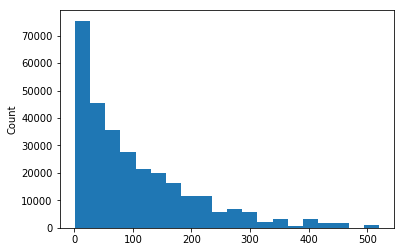

In [22]:
x = df['user_review_count']
plt.hist(x, bins=20)
plt.ylabel('Count')
plt.show()


The average number of ratings given by the users is 104



Find the average user ratings



In [23]:
review_avg =  df.groupby('review_profilename' , as_index=False)['review_overall'].mean()


In [24]:
review_avg.loc[:,"review_overall"].mean()

3.949794560624539

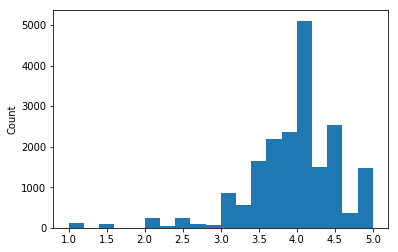

In [25]:
x = review_avg['review_overall']
plt.hist(x, bins=20)
plt.ylabel('Count')
plt.show()


The average user ratings is 3.9



## Dividing the dataset into train and test

In [26]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30, random_state=31)

In [27]:
print(train.shape)
print(test.shape)

(208100, 5)
(89187, 5)


In [33]:
df = df.drop_duplicates(['beer_beerid','review_profilename'])


In [34]:
df.shape

(296242, 5)

In [38]:
# pivot ratings 
df_beer = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 0)

In [39]:
df_beer.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [56]:
dummy_train = train.copy()
dummy_test = test.copy()

In [58]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 0)

In [59]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0tt0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [60]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User Similarity Matrix

## Using Cosine Similarity

In [41]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [42]:
user_correlation.shape

(17121, 17121)

## Using adjusted Cosine 


In [44]:
# pivot ratings 
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 0)

In [45]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalising the rating of the movie for each user aroung 0 mean

In [46]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [47]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,...,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049,-0.042049
04101Brewer,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,...,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933,-0.001933
05Harley,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,...,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399,-0.046399
0beerguy0,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,...,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867,-0.003867
0tt0,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,...,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650,-0.024650


### Finding cosine similarity


In [48]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.00000000e+00 -2.15663556e-03 -1.03358476e-02 ... -9.35803189e-03
  -3.05068094e-03 -3.05068094e-03]
 [-2.15663556e-03  1.00000000e+00 -2.31749498e-03 ... -2.09824996e-03
  -6.84021090e-04 -6.84021090e-04]
 [-1.03358476e-02 -2.31749498e-03  1.00000000e+00 ... -1.00560300e-02
  -3.27822554e-03 -3.27822554e-03]
 ...
 [-9.35803189e-03 -2.09824996e-03 -1.00560300e-02 ...  1.00000000e+00
  -2.96809127e-03 -2.96809127e-03]
 [-3.05068094e-03 -6.84021090e-04 -3.27822554e-03 ... -2.96809127e-03
   1.00000000e+00 -9.67585873e-04]
 [-3.05068094e-03 -6.84021090e-04 -3.27822554e-03 ... -2.96809127e-03
  -9.67585873e-04  1.00000000e+00]]


## Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [49]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [51]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[ 4.61891182,  8.57377377,  5.07221021, ...,  2.44432554,
         8.91851001,  5.961523  ],
       [ 0.        ,  1.19275584,  1.54411227, ...,  1.72558151,
         0.67682006,  1.13518696],
       [ 4.08635826, 11.42099546,  7.37649757, ...,  3.33874689,
         9.10355189,  5.97953654],
       ...,
       [ 4.98876986, 10.39771341,  6.53579326, ...,  1.3366879 ,
         1.63876426,  1.57557245],
       [ 1.93387902,  7.85916601,  6.64587531, ...,  0.76908398,
         1.12494225,  0.78836966],
       [ 1.22028927,  2.0791845 ,  2.37411148, ...,  0.18025134,
         0.37163286,  1.00612658]])

In [52]:
user_predicted_ratings.shape

(17121, 2069)

In [61]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,4.618912,8.573774,5.072210,8.579429,2.097521,3.253074,8.562619,6.312005,25.517650,12.436077,...,14.224856,3.253036,2.184078,3.170448,4.048300,3.044759,2.802411,2.444326,8.918510,5.961523
04101Brewer,0.000000,1.192756,1.544112,0.607436,0.000000,0.000000,0.762685,0.493276,2.787898,2.260113,...,1.470329,0.262077,0.785789,0.827499,0.957591,1.068194,0.872137,1.725582,0.676820,1.135187
05Harley,4.086358,11.420995,7.376498,11.551045,2.673571,2.359483,9.258872,5.195626,25.767678,15.365812,...,14.249016,4.248196,3.651652,3.870142,3.387927,2.704946,2.812449,3.338747,9.103552,5.979537
0beerguy0,3.904960,6.041791,5.672545,5.237494,1.006892,1.172081,4.777791,6.344468,9.664328,9.767301,...,2.337765,0.827625,0.251111,0.000000,0.791032,0.500557,0.920856,1.092682,1.674426,0.651097
0tt0,5.769711,16.328498,9.208176,14.435221,3.095159,3.160848,12.992775,12.453862,32.519376,16.789240,...,14.238660,3.799708,4.073759,4.463894,4.249282,3.108472,3.314948,3.408865,10.865498,4.252993


### Finding the top 5 recommendation for the user 

In [62]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
51512    220.934349
7971       9.527635
54522      8.215302
1056       7.473701
1013       7.185987
Name: 04101Brewer, dtype: float64

# Item Based Similarity

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user intead of each movie. 

In [64]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 0).T

beer_features.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,108Dragons,1099,...,ztruempy,zuccard,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalising the review rating for each beer

In [65]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [66]:
df_subtracted.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,108Dragons,1099,...,ztruempy,zuccard,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,...,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559,-0.016559
6,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,...,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353,-0.041353
7,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,...,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262,-0.027262
10,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,...,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869,-0.034869
14,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,...,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878,-0.008878


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [67]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.0452711   0.0746709  ... -0.0030351   0.01399211
   0.00602159]
 [ 0.0452711   1.          0.03334119 ...  0.02058613 -0.00704766
   0.01469957]
 [ 0.0746709   0.03334119  1.         ...  0.0101493   0.00295189
   0.00682777]
 ...
 [-0.0030351   0.02058613  0.0101493  ...  1.          0.07623452
   0.01837626]
 [ 0.01399211 -0.00704766  0.00295189 ...  0.07623452  1.
   0.03701082]
 [ 0.00602159  0.01469957  0.00682777 ...  0.01837626  0.03701082
   1.        ]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [68]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.0452711 , 0.0746709 , ..., 0.        , 0.01399211,
        0.00602159],
       [0.0452711 , 1.        , 0.03334119, ..., 0.02058613, 0.        ,
        0.01469957],
       [0.0746709 , 0.03334119, 1.        , ..., 0.0101493 , 0.00295189,
        0.00682777],
       ...,
       [0.        , 0.02058613, 0.0101493 , ..., 1.        , 0.07623452,
        0.01837626],
       [0.01399211, 0.        , 0.00295189, ..., 0.07623452, 1.        ,
        0.03701082],
       [0.00602159, 0.01469957, 0.00682777, ..., 0.01837626, 0.03701082,
        1.        ]])

# Prediction

In [69]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[1.60553795, 2.32049438, 1.80484216, ..., 1.86684676, 2.42234624,
        2.53261403],
       [0.        , 0.10344952, 0.18249491, ..., 0.33980758, 0.08639462,
        0.14069405],
       [2.14132296, 2.85829673, 2.16368844, ..., 2.61723818, 2.64773178,
        3.08886801],
       ...,
       [2.73127969, 2.99003644, 2.70791394, ..., 1.44761086, 0.84094448,
        1.00263914],
       [0.27141541, 0.49072793, 0.56479089, ..., 0.1592182 , 0.06078509,
        0.11397248],
       [0.26746175, 0.16654445, 0.25955494, ..., 0.03187361, 0.05263608,
        0.23564877]])

In [70]:
item_predicted_ratings.shape

(17121, 2069)

In [71]:
dummy_train.shape

(17121, 2069)

### Filtering the rating only for the movies not rated by the user for recommendation

In [72]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.605538,2.320494,1.804842,2.445393,1.674143,3.104696,2.166575,2.518112,3.892484,2.931364,...,3.811545,2.516004,1.009153,2.302526,2.184198,1.648384,1.645306,1.866847,2.422346,2.532614
04101Brewer,0.000000,0.103450,0.182495,0.019102,0.000000,0.000000,0.019114,0.062369,0.124554,0.130866,...,0.091199,0.039669,0.105451,0.142970,0.177080,0.206002,0.156783,0.339808,0.086395,0.140694
05Harley,2.141323,2.858297,2.163688,3.295812,2.387187,2.522612,2.361041,2.093893,4.144731,3.564812,...,4.093014,3.439108,1.699916,3.298340,3.183707,2.338782,2.378599,2.617238,2.647732,3.088868
0beerguy0,0.562543,0.369960,0.549455,0.422777,0.125032,0.132881,0.287260,0.434796,0.455805,0.637843,...,0.141773,0.102750,0.016525,0.000000,0.072789,0.038478,0.113869,0.200356,0.099160,0.063283
0tt0,1.217038,2.288458,1.733829,2.093656,1.186732,1.742417,1.921917,1.859338,2.763650,2.139736,...,1.769440,1.488463,0.591845,1.395155,1.699288,1.110374,1.463995,1.138282,1.295567,1.110577


### Top 5 prediction for the user -1

In [73]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
51512    16.000000
54522     0.679371
45723     0.633086
50081     0.544059
22189     0.542612
Name: 04101Brewer, dtype: float64

# Evaluation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user. 

## Using User Similarity

In [74]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 0)

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.00000000e+00 -1.51973792e-03 -4.00417837e-03 ... -2.14604056e-03
  -1.51973792e-03 -1.51973792e-03]
 [-1.51973792e-03  1.00000000e+00 -1.27407261e-03 ... -6.82839586e-04
  -4.83558994e-04 -4.83558994e-04]
 [-4.00417837e-03 -1.27407261e-03  1.00000000e+00 ... -1.79913356e-03
  -1.27407261e-03 -1.27407261e-03]
 ...
 [-2.14604056e-03 -6.82839586e-04 -1.79913356e-03 ...  1.00000000e+00
  -6.82839586e-04 -6.82839586e-04]
 [-1.51973792e-03 -4.83558994e-04 -1.27407261e-03 ... -6.82839586e-04
   1.00000000e+00 -4.83558994e-04]
 [-1.51973792e-03 -4.83558994e-04 -1.27407261e-03 ... -6.82839586e-04
  -4.83558994e-04  1.00000000e+00]]


In [76]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.73254951, 0.89050654, 1.36092554, ..., 0.        , 1.6455885 ,
        1.41069364],
       [0.        , 0.        , 0.        , ..., 0.        , 0.6682536 ,
        0.5940032 ],
       [1.12912925, 0.91114225, 1.42591979, ..., 1.26254277, 1.50626414,
        0.97432783],
       ...,
       [0.23899649, 2.23284701, 1.62971157, ..., 0.82179481, 0.17772023,
        0.82893525],
       [0.        , 3.66807381, 1.16278063, ..., 0.        , 1.03903279,
        0.81586178],
       [0.34621018, 0.        , 0.51488271, ..., 1.54183122, 0.        ,
        0.        ]])

### Doing prediction for the movies rated by the user

In [77]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [78]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Using Item similarity

In [83]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 0)

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')`
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [84]:
test_item_correlation.shape

(12537, 12537)

In [85]:
test_beer_features.shape

(12537, 2069)

In [87]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0)))
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall' , fill_value = 0)


So UBCF seems to get better then IBCF especially with higher values of n.



Making Recommendations using UBCF


## $cokes
## [1] "7971" "645"  "1346" "582"  "2041"


## $genog
## [1] "57908" "1160"  "1093"  "1161"  "1445"


## $giblet
## [1] "19960" "4083"  "582"   "11757" "2041"
